## 回归模型
![线性回归示意图](./images/监督学习-回归-1.png)
- 回归模型预测数值，线性回归是回归模型的一种

| 特征   | 标签  |
|------|-----|
| 2104 | 400 |
| 1416 | 232 |
| 1534 | 315 |
| ...  | ... |
| 3210 | 870 |

### 机器学习术语
- 训练集（training set): 用来训练模型的数据
- x：特征（feature）/输入变量
- y：输出变量/目标变量
- m：训练集的数量
- (x,y): 单个训练数据
- $x^{(i)}$, $y^{(i)}$： 第i个训练数据

监督学习：

训练集 -- 学习算法 -- 得到一个 f（数学模型， 函数）

x（特征）-- f（模型，函数） -- 预测（预测的y）

问题：这个f怎么表示？

f(x) = wx + b,  这是一个最简单的回归模型：线性回归。 但它可以作为其他回归模型的理解基础
在示例的数据中，它是单变量的线性回归，特征只有一个变量

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# x_train 输入变量
# y_train 目标变量
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


In [4]:
# 使用m 表示训练数据的数量
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
# m = len(x_train)
print(f"训练数据的数量: {m}")

x_train.shape: (2,)
训练数据的数量: 2


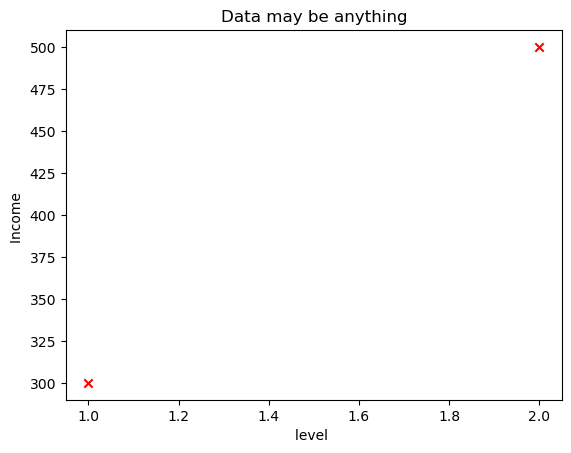

In [6]:
# 画数据的散点图
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Data may be anything")
# Set the y-axis label
plt.ylabel('Income ')
# Set the x-axis label
plt.xlabel('level ')
plt.show()

In [14]:
# 用直线（线性模型）去匹配训练数据，定义线性模型本身的参数 w，b （f(x)=wx+b)
w = 200
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 200
b: 100


In [ ]:
# 可以对每个训练数据的输入变量，计算 f 预测的输出
def compute_model_output(x, w, b):
    """
    计算线性模型的预测
    Args:
      x (ndarray (m,)): Data, m 个训练数据的输入变量
      w,b (scalar)    : 模型参数
    Returns
      f_wb (ndarray (m,)): 模型对输入的预测
    """
    return w*x + b


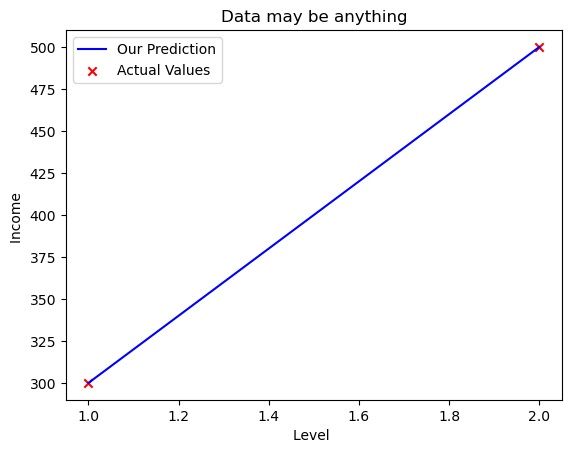

In [15]:
# 调用compute_model_output, 画出输出

tmp_f_wb = compute_model_output(x_train, w, b)
tmp_f_wb
# 画预测的线
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
#
# 画训练数据
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
#
# 设置标题
plt.title("Data may be anything")
#
# 设置y轴标签
plt.ylabel('Income ')
#
# 设置x轴标签
plt.xlabel('Level ')
plt.legend()  # 显示图例
plt.show()

In [ ]:
# 随堂练习：
# 尝试去为线性模型设置不同w和b， w，b是多少的时候可以最好地拟合训练数据


In [16]:
# 预测：现在有了具体的模型（得出了模型的参数，在线性模型里是w和b），可以拿它用来预测没有见过的输入
x_new = 1.2
income_pred = w * x_new + b
print(f"对x=1.2预测的数据: {income_pred:.2f}")

对x=1.2预测的数据: 340.00


### 损失函数
![单个损失](./images/监督学习-回归-2.png)
- 衡量模型的表现，损失函数的值越小说明模型表现越好
- 最小化损失函数的值也被称作训练目标
- f(x) = wx+b, x是固定的，由输入的数据决定，w和b是可以调整的，w，b也被称作模型的权重
- 训练数据的实际的y和f(x)预测的y有差距，因此可以将把每个训练数据的误差都考虑到，定义如下损失函数：均方误差损失（MSE）：
<!-- 预测值定义 -->
$$
\hat y^{(i)} \;=\; w^{\top}x^{(i)} + b
$$

<!-- 损失函数 -->
$$
J(w,b) \;=\; \frac{1}{2m}\sum_{i=1}^{m}\!\bigl(\,\hat y^{(i)} - y^{(i)}\bigr)^2
$$
- 1/2m为了让这个损失值不会因为训练集变大，使误差变得很大；也为了后续计算方便
- 注意：不同的w，b决定了不同的直线模型，不同的直线模型在训练数据上有不同的损失 -> J(w,b)是关于w，b的函数！w，b是自变量。
- 找到w，b使得J(w,b)最小化，这样的w，b也能最贴合训练数据，只要J(w,b)的定义合理

总结： 模型训练的四要素
- 模型的假设： 对模型数学公式的假设，直线模型
- 参数：数学公式自己的参数，wx+b， 参数 w和b
- 损失函数: 关于参数的函数，输入：模型的参数 返回的数字
- 目标： 找到w和b，可以最小化损失函数

![损失函数图像](./images/监督学习-回归-3.png)

### 达到目标/最小化损失函数的方式 -- 梯度下降
- 一个函数关于每个变量的偏导数，每个变量的偏导数组织在一起是一个向量，这个向量的方向是函数增长最快的方向
- 每个具体w，b计算梯度,得到具体的向量，当前w，b验证梯度相反的方向走

